# Binary Prediction For RainFall Dataset
[image_0]: https://pfst.cf2.poecdn.net/base/image/aaa884f47ce802be03b05454039ea4481ecd9c1e67c6f03d4dd1c23848aeaf12?w=1024&h=768&pmaid=314940466
![A logo design featuring the text 'Binary Predictions For Rainfall Dataset'. The logo should have a clean and modern aesthetic, using elegant fonts and incorporating artistic elements related to data analysis and weather, such as stylized rain droplets and abstract graphs. The color scheme should feature vibrant blues and greens, with a subtle gradient for added depth and a professional touch. The background should be bright and engaging, enhancing the overall look of the logo.][image_0]

## About Authur:
Name: Muhammad Muneebullah

contact: contact:[linkedin](https://www.linkedin.com/in/muneebullah-muneeb-241393337/?lipi=urn%3Ali%3Apage%3Ad_flagship3_feed%3BorGqIcU3QP6nqnrKnFPI%2FQ%3D%3D)

contact in kaggle:  [kaggle](https://www.kaggle.com/)

Email: muneebullahmuneeb63@gmail.com

## About Dataset(Meta Data)

### Data Descriptions:
`id`: Unique identifier for each column

`day`: Day of the year (365).

`pressure`: Atmospheric pressure

`maxtemp`: Maximum temperature 

`mintemp`: Minimum temperature

`temperature`: Average temperature

`dewpoint`: Dew point temperature

`humidity`: Relative humidity

`windspeed`: Wind speed

`winddirection`: Wind direction

`cloud`: Cloud cover

`sunshine`: Sunshine hours

`rainfall`: Rainfall amount


## Aims and Objectives:
- First we can explore the data 
- seconds we check the missing values
- We check the outliers in the dataset
- We check the correlation between the variables
- Then we perform the Machine learning
- And give the prediction for the rainfall

## Using Libraries:
`pandas`: for data manipulation and analysis

`numpy`: for numerical operations

`matplotlib.pyplot`: for data visualization

`seaborn`: for data visualization

`scikit-learn`: for machine learning






## 1.Import Libraries

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score, classification_report, confusion_matrix
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

## 2.Load the Dataset

In [43]:
# lets import the data set using csv file
df = pd.read_csv('train.csv')
# lets check the first 5 rows of the data set
df.head()

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,0,1,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1
1,1,2,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,1
2,2,3,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,1
3,3,4,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6,1
4,4,5,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8,0


## 3.Lets Explore the data

In [44]:
# lets we see the info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2190 entries, 0 to 2189
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             2190 non-null   int64  
 1   day            2190 non-null   int64  
 2   pressure       2190 non-null   float64
 3   maxtemp        2190 non-null   float64
 4   temparature    2190 non-null   float64
 5   mintemp        2190 non-null   float64
 6   dewpoint       2190 non-null   float64
 7   humidity       2190 non-null   float64
 8   cloud          2190 non-null   float64
 9   sunshine       2190 non-null   float64
 10  winddirection  2190 non-null   float64
 11  windspeed      2190 non-null   float64
 12  rainfall       2190 non-null   int64  
dtypes: float64(10), int64(3)
memory usage: 222.5 KB


In [45]:
# lets wee see the statistical summary of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,2190.0,1094.500000,632.342866,0.0,547.250,1094.50,1641.750,2189.0
day,2190.0,179.948402,105.203592,1.0,89.000,178.50,270.000,365.0
pressure,2190.0,1013.602146,5.655366,999.0,1008.600,1013.00,1017.775,1034.6
maxtemp,2190.0,26.365799,5.654330,10.4,21.300,27.80,31.200,36.0
temparature,2190.0,23.953059,5.222410,7.4,19.300,25.50,28.400,31.5
mintemp,2190.0,22.170091,5.059120,4.0,17.700,23.85,26.400,29.8
dewpoint,2190.0,20.454566,5.288406,-0.3,16.800,22.15,25.000,26.7
humidity,2190.0,82.036530,7.800654,39.0,77.000,82.00,88.000,98.0
cloud,2190.0,75.721918,18.026498,2.0,69.000,83.00,88.000,100.0
sunshine,2190.0,3.744429,3.626327,0.0,0.400,2.40,6.800,12.1


In [46]:
# lets we see the shape of the dataset
print('The rows of this dataset are: ', df.shape[0], 'and the columns are: ', df.shape[1])

The rows of this dataset are:  2190 and the columns are:  13


- Lets Explore the maxtemp based on the pressure

In [47]:
# lets we first check the values counts of the maxtemp
print('This is the sum of value counts of the maximum temperature column: ', df['maxtemp'].value_counts().sum())

This is the sum of value counts of the maximum temperature column:  2190


In [48]:
# lets make the plot of the 
print('The number of unique value of the maximum temp columns is : ', df['maxtemp'].nunique())

The number of unique value of the maximum temp columns is :  219


In [49]:
# lets we groupy the maxtemp based on the pressure
# we can use the groupby function from pandas
df.groupby('pressure')['maxtemp'].value_counts()

pressure  maxtemp
999.0     35.1       2
          32.8       1
          35.0       1
          35.2       1
999.6     32.3       1
                    ..
1027.9    21.6       1
1032.3    17.3       1
1034.6    10.4       1
          11.2       1
          17.5       1
Name: count, Length: 1920, dtype: int64

- Here we give the information about the maxtemp based on the pressure

<Axes: xlabel='maxtemp', ylabel='pressure'>

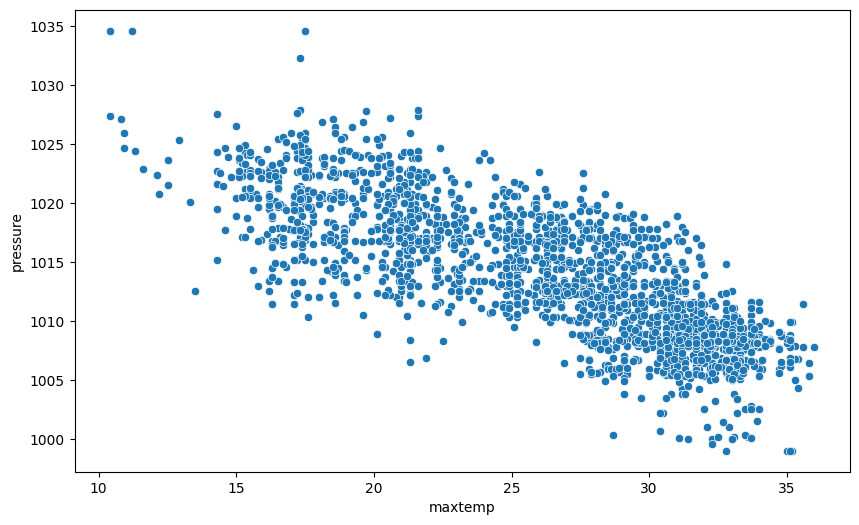

In [50]:
# lets we plot 
plt.figure(figsize=(10, 6))
sns.scatterplot(df, x = 'maxtemp', y = 'pressure')

- Here we give information the maximum temperature is  almost 35 degree Celsius and the maximum pressure is 1035mbar

- Lets we Explore the minimum temperature based on the rainfall

In [51]:
# lets we groupby the min temperature based on the rainfall
df.groupby('rainfall')['mintemp'].min()

rainfall
0    4.7
1    4.0
Name: mintemp, dtype: float64

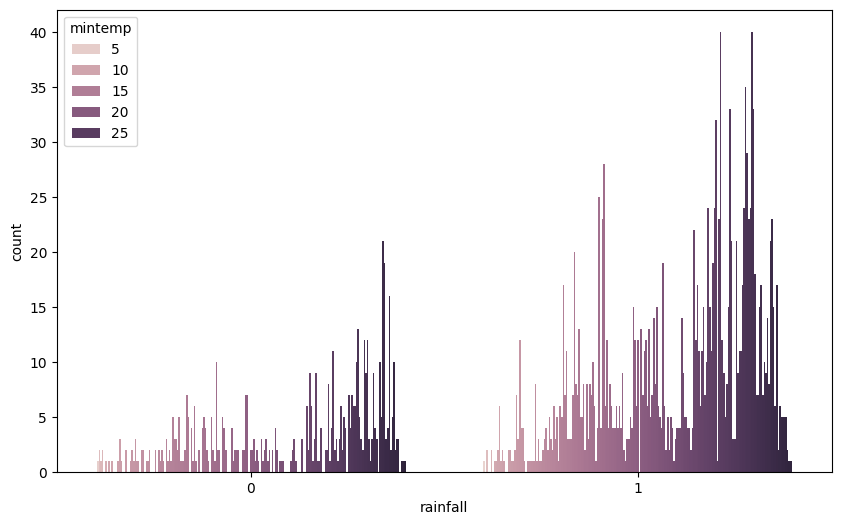

In [52]:
# here we plot the minimum temperature based on the rainfall
plt.figure(figsize=(10,6))
sns.countplot(df, x='rainfall', hue='mintemp')
plt.show()

- Lets Explore the humidity based on the temperature

In [53]:
# lets we groupby the humidity based on the temperature
df.groupby('temparature')['humidity'].value_counts()

temparature  humidity
7.4          61.0        1
8.3          47.0        1
8.5          75.0        1
8.6          73.0        1
8.7          46.0        1
                        ..
31.3         80.0        1
31.4         62.0        1
             78.0        1
             80.0        1
31.5         76.0        1
Name: count, Length: 1449, dtype: int64

In [54]:
# lets we explore the number of unique values in the humidity column
humidity_unique = df['humidity'].nunique()
print(f"Number of unique humidity values: {humidity_unique}")

Number of unique humidity values: 49


## 4.Deal With Missing Values

In [55]:
df.isnull().sum() * 100 / len(df)

id               0.0
day              0.0
pressure         0.0
maxtemp          0.0
temparature      0.0
mintemp          0.0
dewpoint         0.0
humidity         0.0
cloud            0.0
sunshine         0.0
winddirection    0.0
windspeed        0.0
rainfall         0.0
dtype: float64

- There is no missing value it is good for us

<Axes: >

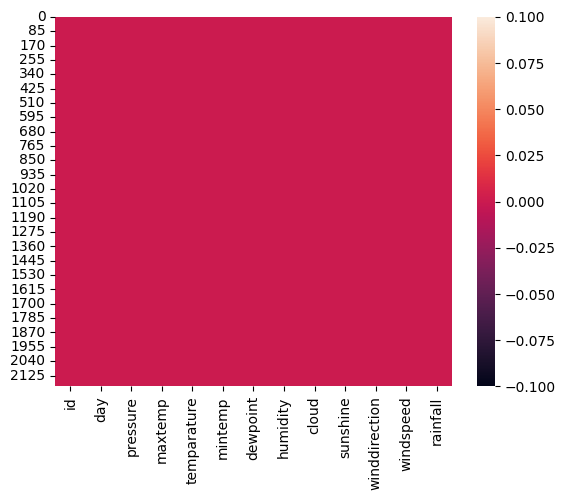

In [56]:
sns.heatmap(df.isnull())

## 5.Deals with the Outliers

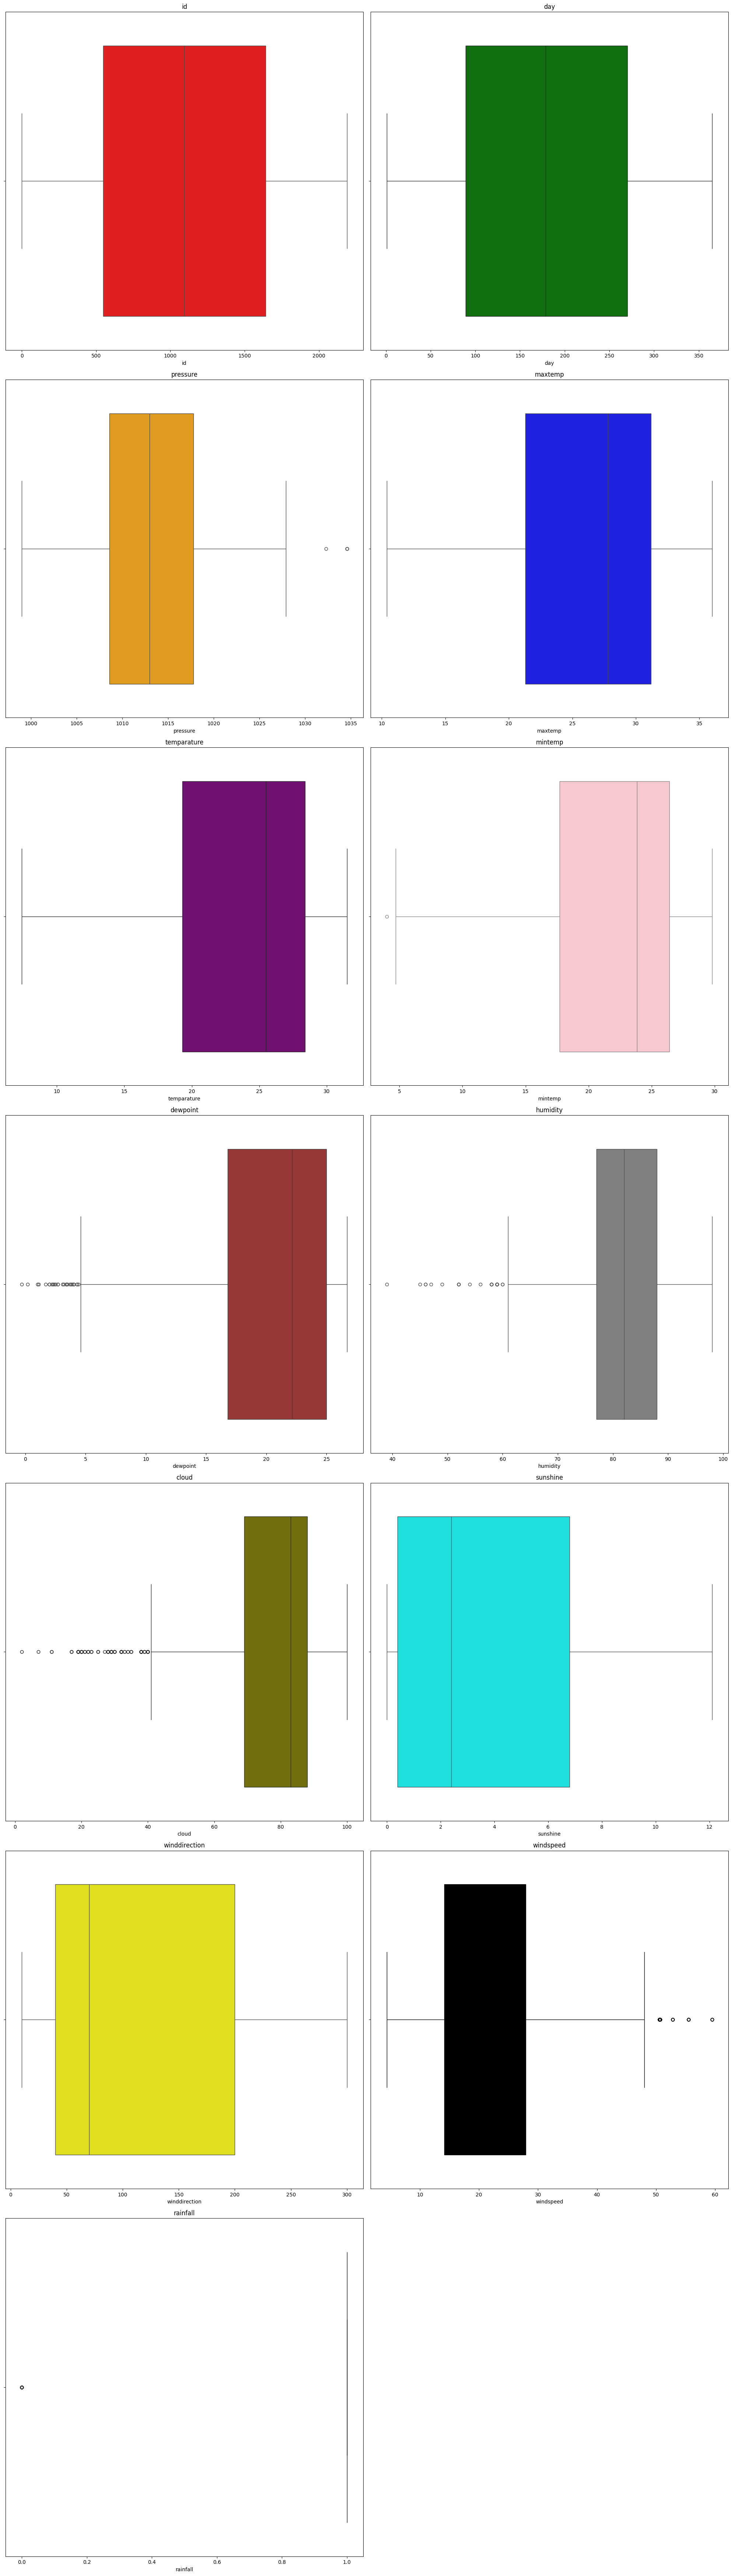

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sample DataFrame for illustration
# df = pd.DataFrame(...)  # Ensure you have your DataFrame defined

# Define the number of columns in your DataFrame
num_cols = len(df.columns)

# Calculate the number of rows needed
num_rows = (num_cols + 1) // 2  # Using integer division to round up

plt.figure(figsize=(20, 10 * num_rows))

colors = ['red', 'green', 'orange', 'blue', 'purple', 'pink', 'brown', 'gray', 'olive', 'cyan', 'yellow', 'black', 'm']

for i, col in enumerate(df.columns):
    plt.subplot(num_rows, 2, i + 1)  # 2 columns
    sns.boxplot(x=df[col], color=colors[i % len(colors)])  # Use modulo to cycle through colors
    plt.title(col)  # Use the column name as the title

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

- There is not outlier in the data.

## 6.Make correlation matrix

<Axes: >

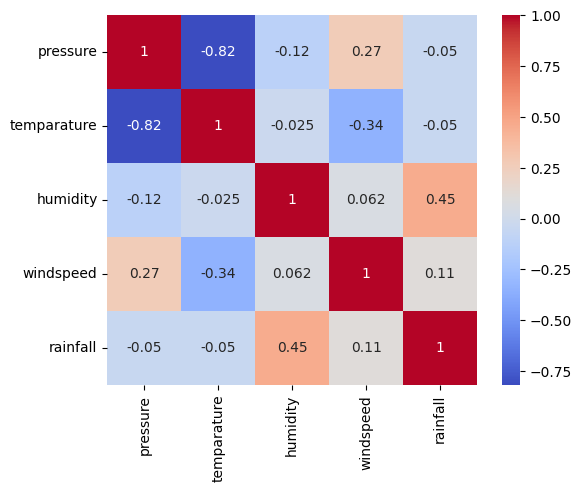

In [58]:
# lets make the correlation matrix 
corr_matrix = df[['pressure', 'temparature', 'humidity', 'windspeed', 'rainfall']].corr()
corr_matrix
# lets plot the corr matrix
import seaborn as sns
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)


## 7.Machine Learnings

In [59]:
# we import all libraries above
# split the data into X and y
X = df.drop('rainfall', axis=1)
y = df['rainfall']
# we split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)                                                    

#### Before Prediction We choose the best model for prediction

In [60]:

models = [
    ('Random Forest', RandomForestRegressor(random_state=42)),
    ('Gradient Boosting', GradientBoostingRegressor(random_state=42)),
    ('XG boost', XGBRegressor(random_state=42)),
    ('Support Vector Regressor', SVR()),
    ('Lasso Regressor', Lasso(random_state=42)),
    ('Ridge Regressor', Ridge(random_state=42))
]

best_model = None
best_accuracy = 0.0


for name, model in models:
    pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('one encoder', OneHotEncoder(handle_unknown='ignore')),
        ('model', model)
    ])
    
    scores = cross_val_score(pipeline, X, y, cv=5)
    
    mean_accuracy = scores.mean()
    
    
    pipeline.fit(X_train , y_train)
    
    y_pred = pipeline.predict(X_test)
    MSE = mean_squared_error(y_pred, y_test)
    
    print('Mean Squared Error: ', MSE)
    print('Croos validation accuracy: ', mean_accuracy)
    print('Model: ', name)
    
    

Mean Squared Error:  0.1517337899543379
Croos validation accuracy:  0.28223375443783155
Model:  Random Forest
Mean Squared Error:  0.1332894849733769
Croos validation accuracy:  0.31881528173541884
Model:  Gradient Boosting
Mean Squared Error:  0.13590572774410248
Croos validation accuracy:  0.3318411111831665
Model:  XG boost
Mean Squared Error:  0.13083123655657886
Croos validation accuracy:  0.33194776732302944
Model:  Support Vector Regressor
Mean Squared Error:  0.1988598157878276
Croos validation accuracy:  -0.005692490692297758
Model:  Lasso Regressor
Mean Squared Error:  0.15169405130883776
Croos validation accuracy:  0.17047440165039987
Model:  Ridge Regressor


- Here we see the xgboost is best for mpdel prediction


In [61]:
model = XGBRegressor()
model.fit(X_train, y_train)
# Make predictions
y_pred = model.predict(X_test)
print('Mean Squared Error:',mean_squared_error(y_test, y_pred))


Mean Squared Error: 0.13902711868286133


## 8.Save and Load the model

In [62]:
# save the model
import pickle

# Assuming 'model' is your trained model
with open('model_filename.pkl', 'wb') as file:
    pickle.dump(model, file)

In [63]:
# load the model
with open('model_filename.pkl', 'rb') as file:
    loaded_model = pickle.load(file)